# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     776.8
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           2.15e-39
Time:                        16:20:17   Log-Likelihood:                -2.1655
No. Observations:                  50   AIC:                             12.33
Df Residuals:                      46   BIC:                             19.98
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1020      0.090     56.821      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.61014615  5.06814923  5.48980127  5.85020169  6.13343636  6.33519232
  6.46346636  6.53725115  6.58341485  6.63228668  6.71267396  6.84712916
  7.04824454  7.31658334  7.64058718  7.99847512  8.36182217  8.70022948
  8.98631872  9.20023033  9.33288634  9.38748187  9.3789602   9.33155761
  9.27482142  9.23875548  9.24889059  9.32208989  9.46377826  9.66705107
  9.91380856 10.17772958 10.42859609 10.63725791 10.78042199 10.8444794
 10.82774125 10.74071613 10.60438365 10.44674748 10.29823446 10.18669556
 10.13283001 10.14678453 10.2264862  10.35798307 10.5177364  10.67648804
 10.80406743 10.87434854]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.85720127 10.71870713 10.47678398 10.17226437  9.85889827  9.59019325
  9.40631393  9.32424828  9.33364839  9.39936401]


## Plot comparison

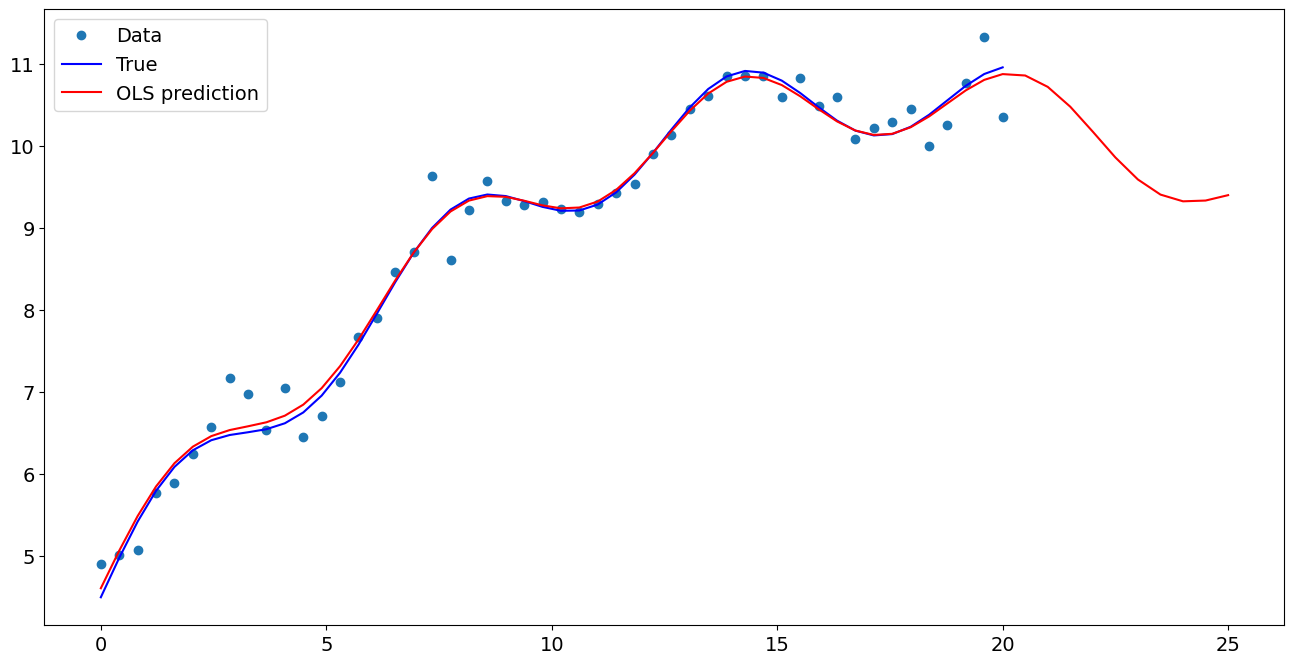

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.101978
x1                  0.489087
np.sin(x1)          0.456899
I((x1 - 5) ** 2)   -0.019673
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.857201
1    10.718707
2    10.476784
3    10.172264
4     9.858898
5     9.590193
6     9.406314
7     9.324248
8     9.333648
9     9.399364
dtype: float64